<div dir=rtl>

# *מגישים:* 
שון פזרקר - 208426890<br>
חיים עוזר - 316063569

<div dir=rtl>

# הקדמה


* בפרויקט זה נמצא כ 20 תובנות ממערך הנתונים של תיירות בטנזניה .<br>
 נראה תובנות כמה כסף ישקיעו תיירים בעת הביקור במדינה בהתאם לתכונותיהם, התפלגותם, ארגונם וסוגי דפוסי סגירת הטיול שלהם אשר נפוצים בתיירות.

* נבדוק גם את השפעת מגדרם, מקור מגוריהם, מגוריהם בטיול וכו.


<div dir=rtl> 

##  יבוא ספריות ולאחר מכן קליטת סט מערך הנתונים 

In [ ]:
from sklearn.datasets import load_iris,fetch_california_housing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import re
import sys

import time
import datetime

import numpy as np
import pandas as pd
from pathlib import Path  

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import time 
import plotly.graph_objs as go
import plotly
from google.colab import files

from sklearn.model_selection import RandomizedSearchCV
# matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [ ]:
df = pd.read_csv('/content/train.csv')
Test = pd.read_csv('/content/test.csv')
VariableDefinitions = pd.read_csv('/content/VariableDefinitions.csv')
SampleSubmission = pd.read_csv('/content/SampleSubmission.csv')

<div dir=rtl>

# הבנת מערך נתונים ומשתנים

<div dir=rtl>

נבדוק את הנתונים המיובאים ונעיין בכל משתנה.<br> המטרה היא לקבוע את סוג הנתונים של כל משתנה. <br> לשם כך, אנו עוברים את התהליך הבא.

1. נבדוק את התיעוד של המשתנה הנתון הראשון: תיאור המשתנה יתן לנו מושג על הקשר בין סוג הנתונים למשתנה.<br> זה ישמש מאוחר יותר בתהליך של ניווט משתנים.
2. נבדוק את סוג האחסון של כל משתנה באמצעות info: נפריד לסוגי int, float/object ונבדוק את סוגי המשתנים המאוחסנים.
3. נשתמש ב-value_counts כדי לקבוע את סוג ומספר הערכים המאוחסנים: חלק מהמשתנים המספריים יכולים להיות מדורגים או נומינליים(לא רציפים).<br> נבדוק את הערכים המאוחסנים בפועל כדי לקבוע את הסוג המדויק של המשתנה.

 |  Feature   |  Description|
|----------|-------------|
| ID |Unique identifier for each tourist|
| country |The country a tourist coming  from.|
| age_group |The age group of a tourist.|
|travel_with|The relation of people a tourist travel with to Tanzania|
|total_female|Total number of females|
|total_male|Total number of males|
|purpose|The purpose of visiting Tanzania|
|main_activity|The main activity of tourism in Tanzania|
|infor_source|The source of information about tourism in Tanzania|
|tour_arrangment|The arrangment of visiting Tanzania|
|package_transport_int|If the tour package include international transportation service|
|package_accomodation|If the tour package include accommodation service|
|package_food|If the tour package include food service|
|package_transport_tz|If the tour package include transport service within Tanzania |
|package_sightseeing|If the tour package include sightseeing service|
|package_guided_tour|If the tour package include tour guide|
|package_insurance|if the tour package include insurance service|
|night_mainland|Number of nights a tourist spent in Tanzania mainland|
|night_zanzibar|Number of nights a tourist spent in Zanzibar|
|payment_mode|The mode of payment for tourism service|
|first_trip_tz|If it was a first  trip to Tanzania|
|most_impressing|what impressed a toursit in Tanzania|
| total_cost |The total tourist expenditure  in TZS(currency)|

<div dir=rtl>



מטרתנו היא לבחון את 'עלות הביקור' כמושא לחקירה.<br> 'עלות הביקור' מתבטאת במספר צורות שונות ('עלות ב-USD')
כל שאר המשתנים יכולים להשפיע על המשתנה הזה.<br> העלות יכולה להשתנות בהתאם למגדר, לתכנון ולמיקום הלינה.<br> זה מובן מאליו, אבל מעניין לראות איך זה קשור לפרטי פרטים.<br> זה מספק את הכיוון של הניתוח.

In [ ]:
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [ ]:
df.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [ ]:
print("Total Nulls values in every column:\n{0} \n\n\n\n" .format(df.isna().sum()))
datacols=df.columns
for col in datacols:
    percents = ((df[col].isna().sum())/len(df))*100
    print("'{0}' feature Nulls precentage: {1:.2f} %" .format(col,percents))

Total Nulls values in every column:
ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64 




'ID' feature Nulls precentage: 0.00 %
'country' feature Nulls precentage: 0.00 %
'age_group' feature Nulls precentage: 0.00 %
'travel_with' feature Nulls precentage: 23.16 %
'total_female' feature Nulls precentage: 0.06 %
'total_male' feature Nulls precent

<div dir=rtl>

<h3>הסבר המידע שקיבלנו מהדאטא</h3>
<br/>

* למערך הנתונים יש 4809 רשומות ו-23 עמודות, רובן סוגי אובייקטים - object,  מלבד העמודות "total_female", "total_male", "night_mainland", "night_zanzibar", "total_cost    שהם מספר - float64.
* בקטגוריות הבאות נראה כי ישנם ערכים חסרים שדורשים טיפול ב-"travel_with", "total_female", "total_male" ו-"most_impressing" , בשלב זה אנו גם רואים כי רוב הערכים החסרים   הם בעמודת  "travel_with" שהם 23.16% מסך הנתונים בעמודה.


<div dir=rtl>

# גרפים של התפלגות הערכים של המאפיינים השונים

<div dir=rtl>

# טיפול בערכים בעייתים 


<div dir=rtl>

ישנן שתי אסטרטגיות לטיפול בנתונים חסרים, או הסרת רשומות עם ערכים חסרים אלו או החלפת ערכים חסרים בערך ספציפי כמו (ממוצע, חציון או מצב) של העמודה.

הדרך בה בחרנו היא למלא את הערכים החסרים ב0

In [ ]:
df['total_male'] = df['total_male'].fillna(0)
df['total_female'] = df['total_female'].fillna(0)

<div dir=rtl>

נמלא את הרשומות הריקות בערכים


In [1]:
df['most_impressing'] = df['most_impressing'].fillna("No comments")
Test['most_impressing'] = Test['most_impressing'].fillna("No comments")
for index, record in df.iterrows():
  if pd.isna(record.travel_with):
    total_female=record.total_female
    total_male=record.total_male
    total=total_female+total_male
    if total==1:
      df.loc[index,'travel_with']="Alone"
    else:
      if total_female==total_male:
        df.loc[index,'travel_with']="Spouse"
      else:
        df.loc[index,'travel_with']="Friends/Relatives"

for index, record in Test.iterrows():
  if pd.isna(record.travel_with):
    total_female=record.total_female
    total_male=record.total_male
    total=total_female+total_male
    if total==1:
      Test.loc[index,'travel_with']="Alone"
    else:
      if total_female==total_male:
        Test.loc[index,'travel_with']="Spouse"
      else:
        Test.loc[index,'travel_with']="Friends/Relatives"


NameError: ignored

<div dir=rtl>

נבדוק שלא נשארו ערכים ריקים

In [ ]:
df.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

In [ ]:
df.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926180,1.008526,8.488043,2.304429,8.114389e+06
std,1.288048,1.138738,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


<div dir=rtl>

# 1. מהי קבוצות גילאים הכי נפוצות לבקר בטנזניה

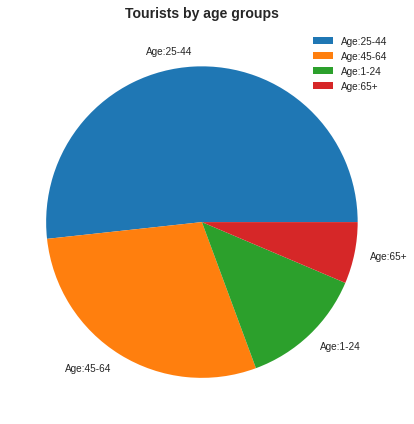

In [ ]:
remo = np.array(df['age_group'].value_counts(sort=True))

labels = ['Age:25-44', 'Age:45-64', 'Age:1-24','Age:65+']

plt.figure(figsize=(6,6))
plt.pie(remo, labels=labels)
plt.legend()
plt.title('Tourists by age groups')
plt.show()

<div dir=rtl>

**> תובנות:**
* ניתן לראות בבירור כי קבוצת הגילאים הנפוצה ביותר כתיירים היא 25-44 ולאחר מכן גילאי 45-64.
* מכך נסיק כי האטרקציות שיש לטנזניה להציע לגילאי 1-24 ולגילאי 65+ היא לא גבוה ולכן הם בוחרים יעדים שונים.


<div dir=rtl>

# 2. נבדוק איזה קבוצת גילאים היא הבזבזנית ביותר 

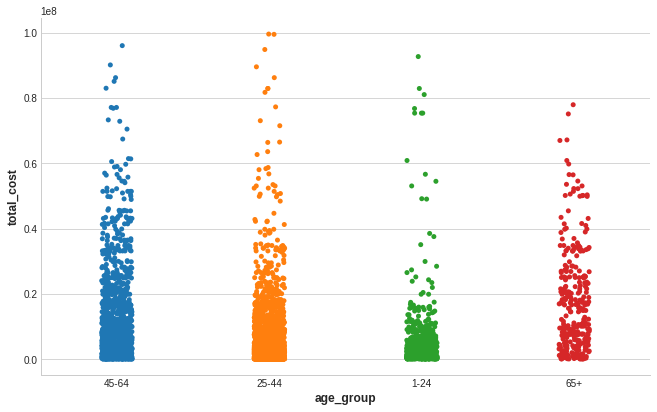

In [ ]:
g = sns.catplot(x='age_group', y='total_cost', data=df)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

<div dir=rtl>

**> תובנות:**
*  קבוצת הגילאים המבוגרת 65+ היא הכי פחות בזבזנית ולאחר מכן הקבוצה הצעירה 1-24. 

<div dir=rtl>

# 3. לצד מי התיירים באים לבקר בטנזניה 

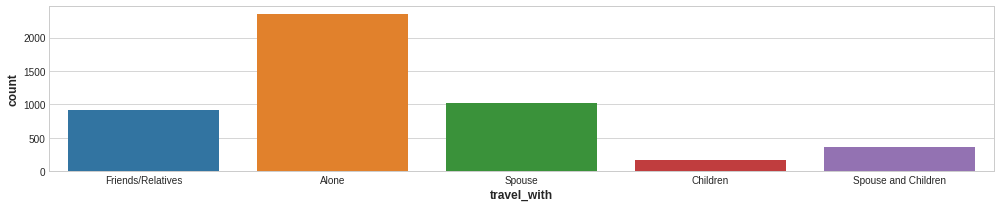

In [ ]:
plt.figure(figsize=(14,3))
sns.countplot(x="travel_with",data=df)

<div dir=rtl>

**> תובנות:**
* רוב התיירים באים לבד לטנזניה, לאחר מכן עיקר התיירים באים בזוגות.


<div dir=rtl>

# 4. האם עלות הטיול למטייל בודד שונה

<Figure size 864x864 with 0 Axes>

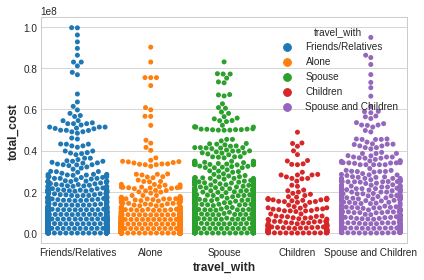

<Figure size 864x864 with 0 Axes>

In [ ]:
sns.swarmplot(x=df['travel_with'],y=df['total_cost'],hue=df['travel_with'],data=df)
plt.figure(figsize=(12,12))

<div dir=rtl>

**> תובנות:**
* תיירים אשר באים בזוגות או במשפחות הם הבזבזנים ביותר.
* אילו התיירים שבאים לבד הם הבזבזים פחות 


<div dir=rtl>

# 5. מהי מטרת הטיול של התיירים

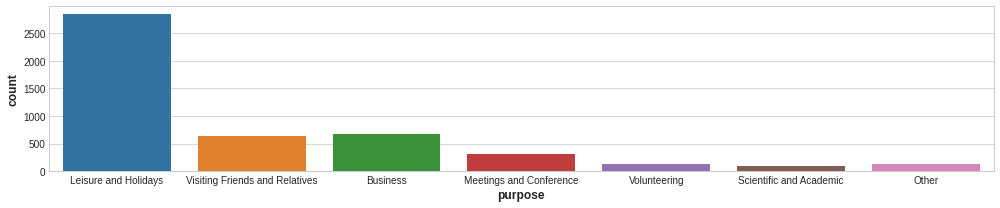

In [ ]:
plt.figure(figsize=(14,3))
sns.countplot(x="purpose",data=df)

<div dir=rtl>

**> תובנות:**
* .באופן ניכר מרבית התיירים באה למטרות חופשה והנאה 
* מכך נסיק כי טנזניה היא יעד אטרקטיבי לחופשה.

<div dir=rtl>

# 6. מהי הפעילות המרכזית בטיול בקרב תיירים

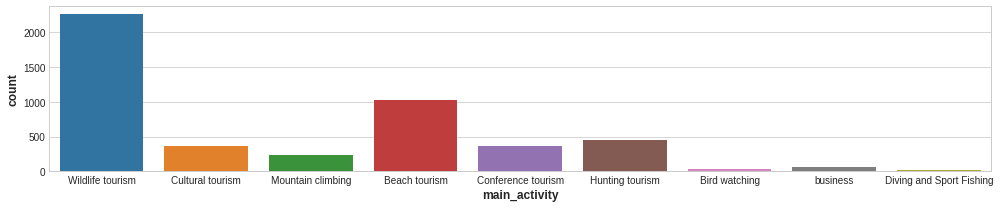

In [ ]:
plt.figure(figsize=(14,3))
sns.countplot(x="main_activity",data=df)

<div dir=rtl>

**> תובנות:**
*  רוב התיירים מגיעים לטנזניה לצפות בסיור חיות בר
* ישנה גם הגעה לצפות בחופי הים 

<div dir=rtl>

# 7.  לצורך בניית הטיול, מהם מקורות המידע המוכרים לתיירים

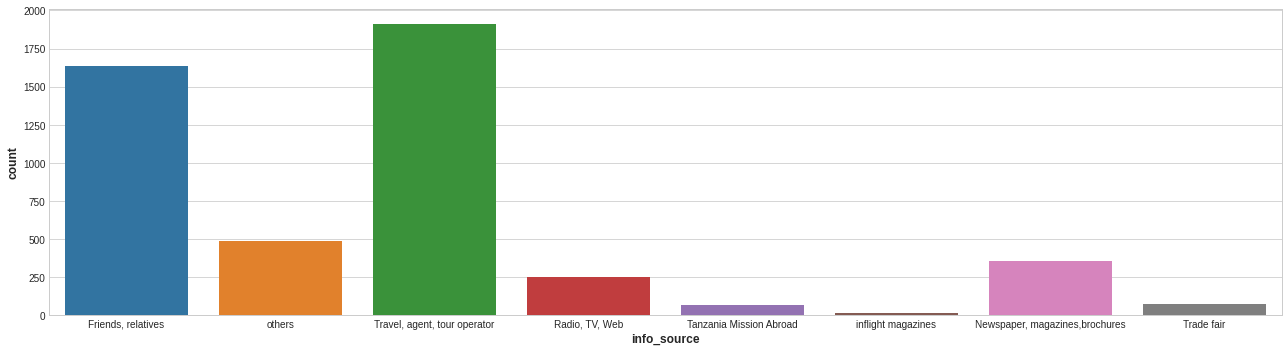

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x="info_source",data=df)

<div dir=rtl>

**> תובנות:**
*  רוב התיירים משיגים את המידע על הטיול והאטרקציות המרכזיות דרך סוכן הנסיעות שלהם.
* כמו כן מידע רב עובד בין בני משפחה וקרובים.

<div dir=rtl>

# 8.  האם רוב המטיילים בטנזניה באים בטיול מאורגן

In [ ]:
number_of_tur = df['tour_arrangement'].value_counts().sort_values(ascending=True)

dataPie = [go.Pie(
        labels = number_of_tur.index,
        values = number_of_tur.values,
        hoverinfo = 'label+value'   
)]
plotly.offline.iplot(dataPie, filename='active_category')

<div dir=rtl>

**> תובנות:**
*  53% מהמטיילים מתכננים את הטיול שלהם לבד.

<div dir=rtl>

# 9.  האם טיול שנבנה לבד או ע"י סוכן משפיע על עלות הטיול

<Figure size 576x576 with 0 Axes>

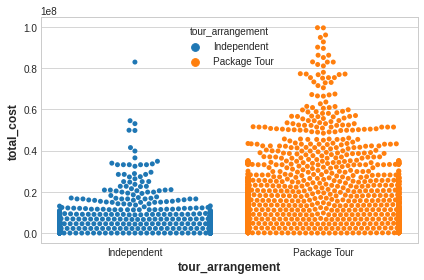

<Figure size 576x576 with 0 Axes>

In [ ]:
sns.swarmplot(x=df['tour_arrangement'],y=df['total_cost'],hue=df['tour_arrangement'],data=df)
plt.figure(figsize=(8,8))

<div dir=rtl>

**> תובנות:**
* טיול שנמכר בחבילה מוכנה דרך סוכן נסיעות הוא יקר משמעותית בטיול שנסגר לבד.

<div dir=rtl>

# 10.  מהם חבילות הטיול המוכנות שנלקחו על ידי המטיילים

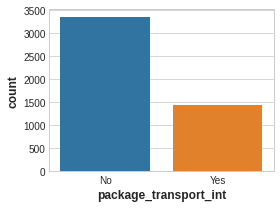

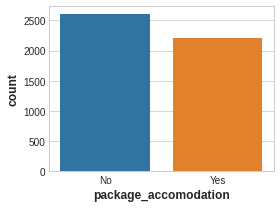

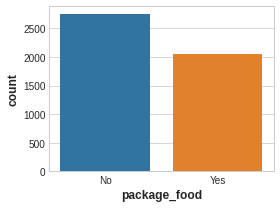

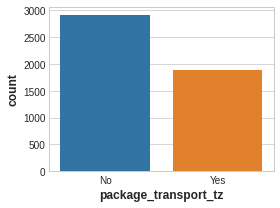

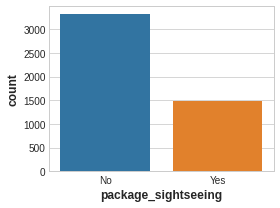

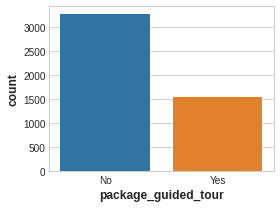

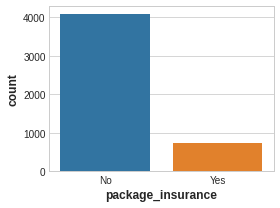

In [ ]:
for k in df.columns[10:-6]:
    plt.figure(figsize=(4,3))
    sns.countplot(x=k,data=df)

<div dir=rtl>

**> תובנות:**
*  בכלל החבילות ניתן לראות כי תיירים בוחרים שלא לקחת אותם
* כמו כן החבילות הנבחרות ביותר הן : דיור , מזון ותחבורה.

<div dir=rtl>

# 11.  האם החבילות הנבחרות ביותר הן משתלמות כגון : דיור , מזון ותחבורה

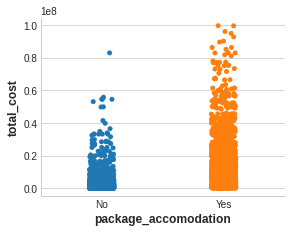

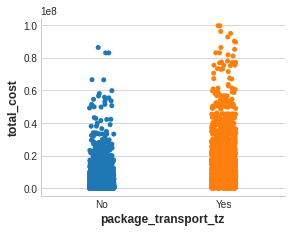

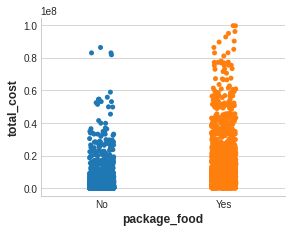

In [ ]:
g = sns.catplot(x='package_accomodation', y='total_cost', data=df)
g.fig.set_figwidth(4)
g.fig.set_figheight(3)

f = sns.catplot(x='package_transport_tz', y='total_cost', data=df)
f.fig.set_figwidth(4)
f.fig.set_figheight(3)

w = sns.catplot(x='package_food', y='total_cost', data=df)
w.fig.set_figwidth(4)
w.fig.set_figheight(3)


<div dir=rtl>

**> תובנות:**
* לא, ניתן לראות באופן ברור כי המטיילים שבחרו להשתמש בחבילה העלות הכללית של טיולם היא יקרה יותר. 
* בכל זאת כ 45% מהמטיילים בחרו לסגור את הדיור בטיולם דרך חבילה מסוכן נסיעות 

<div dir=rtl>

# 12. מגדרם של המטיילים 

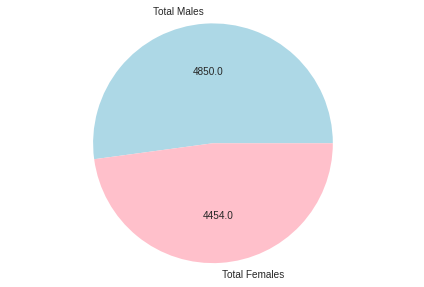

Total tourists:  9304.0


In [ ]:
F= df['total_female'].sum()
M= df['total_male'].sum()

T= M + F

labels = 'Total Males', 'Total Females'
sizes = np.array([M, F])
colors = ['lightblue', 'pink']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value)

plt.axis('equal')
plt.show()

print("Total tourists: ",T)

<div dir=rtl>

**> תובנות:**
*  סהכ התיירים אשר מתועדים בדאטא הינם 9304 
* מתוכם 52% מהתיירים גברים 

<div dir=rtl>

# 13. צורת התשלום הנפוצה בקרב מטיילים 

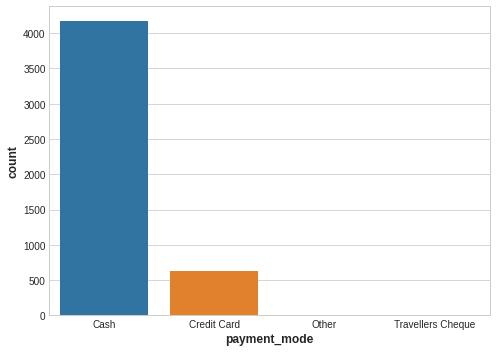

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="payment_mode",data=df)

<div dir=rtl>

**> תובנות:**
* כ87% מהמטיילים משתמשים בכסף מזומן כצורת התשלום המקובלת בטיולם.

<div dir=rtl>

# 14. כמה מטיילים הינם מטיילים חוזרים בטנזניה

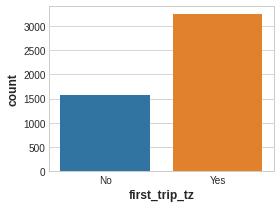

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="first_trip_tz",data=df)

<div dir=rtl>

**> תובנות:**
* כ66% מהמטיילים נמצאים פעם ראשונה בטנזניה
* מכך ניתן להסיק כי מרבית המטיילים אינם מטיילים חוזרים

<div dir=rtl>

# 15. האם מטיילים חוזרים מוציאים פחות כסף על הטיול

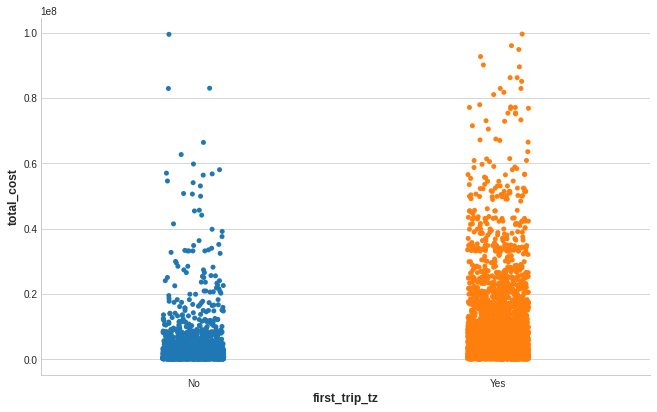

In [ ]:
g = sns.catplot(x='first_trip_tz', y='total_cost', data=df)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

<div dir=rtl>

**> תובנות:**
* כן, באופן ברור ניתן לראות כי מטיילים חוזרים לטנזניה מוציאים פחות כסף על הטיול.

<div dir=rtl>

# 16. מהי דעתם הרווחת של מטיילים בסוף טיולם

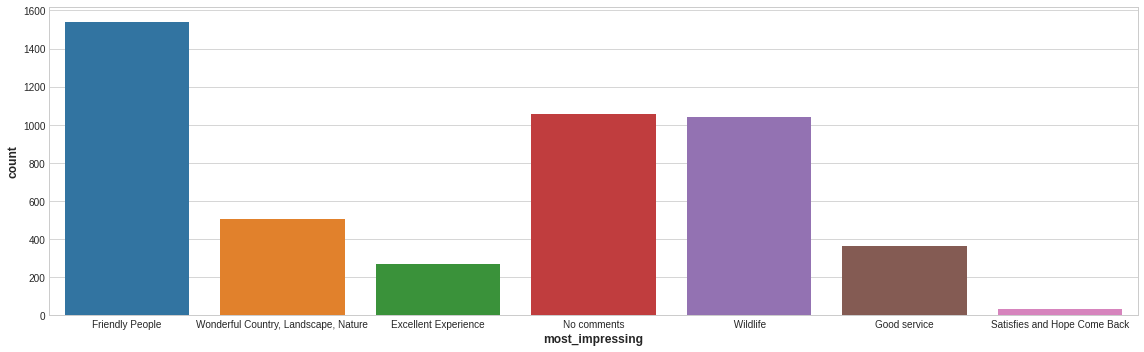

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot(x="most_impressing",data=df)

<div dir=rtl>

**> תובנות:**
* ניתן לראות באופן מובהק כי כלל המטיילים סימנו שלא יחזרו לטיול נוסף במדינה
* בנוסף לכך מרבית המטיילים נהנו מהיחס החברי אותו קיבלו במדינה.

<div dir=rtl>

# 17. מאיזה מדינה הכי נפוצים התיירים בטנזניה

In [ ]:
df['country'].value_counts().reset_index().set_index('index')

,country
index,
UNITED STATES OF AMERICA,695
UNITED KINGDOM,533
ITALY,393
FRANCE,280
ZIMBABWE,274
...,...
NIGER,1
MYANMAR,1
DOMINICA,1


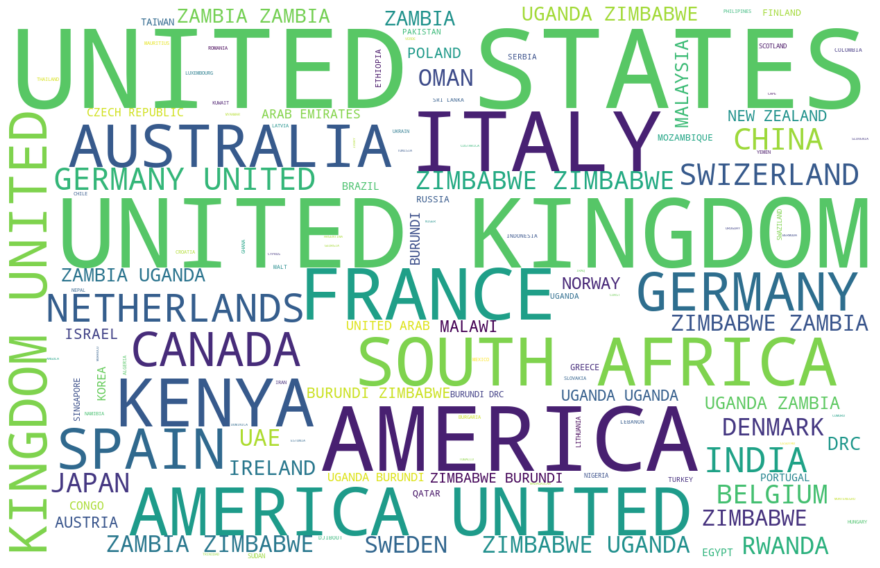

In [ ]:
from wordcloud import WordCloud,STOPWORDS

fig = plt.gcf()
fig.set_size_inches(15,8)
wc = WordCloud(stopwords=STOPWORDS,
              background_color='white',
              contour_width=3,
              contour_color='red',
              width=1250,
              height=800,
              max_words=250,
              max_font_size=250,
              random_state=42
              )

wc.generate(' '.join(df['country']))
fig= plt.imshow(wc, interpolation= "bilinear")
fig= plt.axis('off')

<div dir=rtl>

**> תובנות:**
* ניתן לראות באופן מובהק כי רוב התיירים מגיעים מארה"ב - 14% מכלל התיירים 
* בנוסף לכך כ- 11% מהתיירים הגיעו מבריטניה .


<div dir=rtl>

# 18. טופ 5 המדינות מהן מגיעות מרבית התיירים 

<function matplotlib.pyplot.show(*args, **kw)>

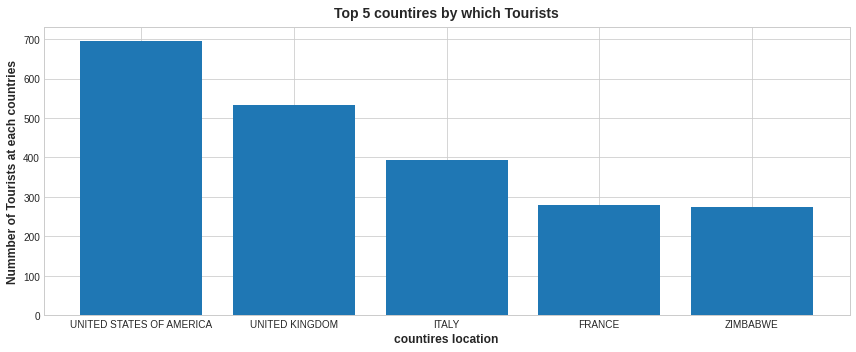

In [ ]:
cl = df['country'].value_counts().reset_index().set_index('index').head()

plt.figure(figsize=(12,5))
plt.bar(np.array(cl.index), np.array(cl.values).reshape(-1))
plt.ylabel('Nummber of Tourists at each countries')
plt.xlabel('countires location')
plt.title('Top 5 countires by which Tourists')
plt.show

<div dir=rtl>

ארה"ב היא המדינה המובילה בכמות התיירים שממנה מגיעים לטנזניה

<div dir=rtl>

# קידוד של הנתונים - Label Encoder



In [ ]:
x = df.copy()
allFeatures=["ID",
          "country",
          "age_group",
          "travel_with",
          "total_female",
          "total_male",
          "purpose",
          "main_activity",
          "info_source",
          "tour_arrangement",
          "package_transport_int",
          "package_accomodation",
          "package_food",
          "package_transport_tz",
          "package_sightseeing",
          "package_guided_tour",
          "package_insurance",
          "night_mainland",
          "night_zanzibar",
          "payment_mode",
          "first_trip_tz",
          "most_impressing",
          ]

x_testing=Test.copy()[allFeatures]
le = preprocessing.LabelEncoder()
for col in allFeatures:
  x_testing[col]=le.fit_transform(x_testing[col])
  x[col]=le.fit_transform(x[col])


So most of the features have 2 classes. We can transfer this one into binary 0 or 1

For other features, we gonna use Label Encoding

<div dir=rtl />

אלגוריתמים של למידת מכונה יכולים לתמוך בערכים קטגוריים ללא מניפולציה נוספת, אך ישנם אלגוריתמים רבים נוספים שלא.<br> אנחנו צריכים להכין את כל הנתונים למודל, אז נמיר משתנים קטגוריים (משתנים שמאוחסנים כערכי טקסט) למשתנים נומיריים.

In [ ]:
x.head() 

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,0,89,2,2,1,1,1,7,0,0,...,0,0,0,0,12,0,0,0,2,674602.5
1,1,99,1,0,1,0,1,3,7,0,...,0,0,0,0,13,7,0,1,6,3214906.5
2,2,99,1,0,0,1,5,3,0,0,...,0,0,0,0,1,27,0,0,1,3315000.0
3,3,99,1,3,1,1,1,7,5,1,...,1,1,1,0,10,0,0,1,2,7790250.0
4,4,13,0,0,1,0,1,7,5,0,...,0,0,0,0,7,4,0,1,4,1657500.0


<div dir=rtl />

Label encoder:
<br/>
ניתן להשיג Label Encoding ב- Python באמצעות ספריית Sklearn. <br> Sklearn מספק כלי יעיל לקידוד התכונות לפי הקטגוריות לערכים מספריים.<br> LabelEncoder מקודד תוויות עם ערך בין 0 ל-מספר כלשהו.<br> אם תווית חוזרת היא מייחסת את אותו הערך לזה שהוקצה קודם לכן.

ראה את הדוגמה הבאה:
<br/>
<img alt="" class="cf kv kw" src="https://miro.medium.com/max/482/1*r0WcEqO9IQa8RAYxXv7Kxg.png" width="241" height="142" loading="lazy" role="presentation">

אם אנחנו צריכים להעביר את הנתונים האלה למודל אנחנו צריכים לקודד את העמודה Country לייצוג המספרי שלה באמצעות Label Encoder. <br> לאחר החלת Label Encoder נקבל תוצאה כפי שנראה להלן
<br/>
<img alt="" class="cf kv kw" src="https://miro.medium.com/max/524/1*hAtLlQ5SnF1WM6Vaa5u7gw.png" width="262" height="143" loading="lazy" role="presentation">

<div dir=rtl>

#  ניתוח נתונים - קורולאציה


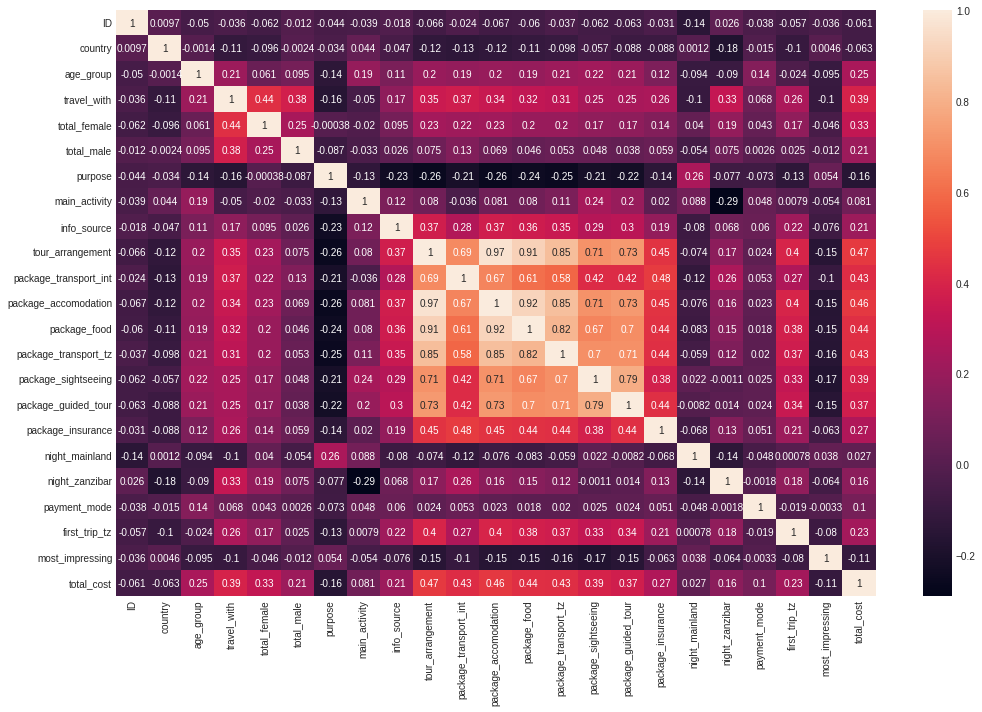

In [ ]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(x.corr(),annot=True)
plt.show()

<div dir=rtl>

# אימון מודלים

In [ ]:
x_training=x.copy()
y_training = x_training.pop('total_cost')

In [ ]:
notRelatedFeatures=["ID","country","main_activity","purpose","night_mainland","payment_mode","most_impressing"]
x_training.drop(notRelatedFeatures,inplace=True,axis=1)
x_testing.drop(notRelatedFeatures,inplace=True,axis=1)

##Random forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_grid = {
                'n_estimators': [10, 20, 40, 50, 100, 150, 200, 500],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [3, 5, 7, 9, 11, 15],
                'bootstrap': [True, False]
                }
rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rfr_random.fit(x_training, y_training)
print("Best parameters:", rfr_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 7, 'bootstrap': False}


In [ ]:
rfr = RandomForestRegressor(n_estimators=150,max_features='sqrt',max_depth=7,bootstrap=False)
rfr.fit(x_training, y_training)

predictions = rfr.predict(x_testing) 
output=Test[["ID"]]
output["total_cost"]=predictions

filepath = Path('RandomForestRegressor.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
output.to_csv(filepath,index=False)

##XGBR

In [ ]:
from xgboost import XGBRegressor
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr =XGBRegressor(seed = 20)
XGBR_random = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
XGBR_random.fit(x_training, y_training)
print("Best parameters:", XGBR_random.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[06:13:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:37] WARNING: /workspace/src/objective/regr

In [ ]:
xgbr =XGBRegressor(seed = 20, subsample=0.89999, n_estimators=500, max_depth=5, learning_rate=0.01, colsample_bytree=0.4, colsample_bylevel=0.7)
xgbr.fit(x_training, y_training)

predictions = XGBR_random.predict(x_testing) 
output=Test[["ID"]]
output["total_cost"]=predictions
output.head()

filepath = Path('XGBRegressor.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
output.to_csv(filepath,index=False)

[06:18:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<div dir=rtl />

XGBoost מודל מחזק אלגוריתמים, הוא עובד על שגיאות שנעשו על ידי לומדים חלשים קודמים כדי למצוא דפוסים חזקים יותר ומכלילים טוב יותר.

XGB  מבוסס על עצי החלטה  "Decision Trees" .

היתרונות כוללים את היותו פשוט להבנה ולהדמיה, דורש מעט הכנת נתונים ויכול להתמודד עם נתונים מספריים וקטגוריים כאחד. החסרונות כוללים מכיוון שהם יכולים ליצור עצים מורכבים שאינם מכלילים היטב, והם יכולים להיות לא יציבים מכיוון ששונות קטנות בנתונים עלולות לגרום ליצירת עץ שונה לחלוטין.

##Tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

regressor = TabNetRegressor(verbose=0,seed=42)
regressor.fit(X_train=x_training.to_numpy(), y_train=y_training.to_numpy().reshape(-1,1),max_epochs=10000)

X_test  = x_testing.to_numpy()
predictions = regressor.predict(X_test)
output=Test[["ID"]]
output["total_cost"]=predictions
output.head()

filepath = Path('TabNetRegressor.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
output.to_csv(filepath,index=False)
